In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from DQN import DQN, DQN_D, DQN_GAEX
from MDP_chain import MDP_chain
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

In [4]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

In [5]:
n_states = 10
steps = n_states + 9
n_episodes = 1000
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [16]:
dqn = DQN(dqn_update_freq)

In [17]:
rewards = []
for episode in tqdm(range(n_episodes)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn_d.step()
        if sa_vals is not None:
            dqn.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

  0%|          | 0/1000 [00:00<?, ?it/s]

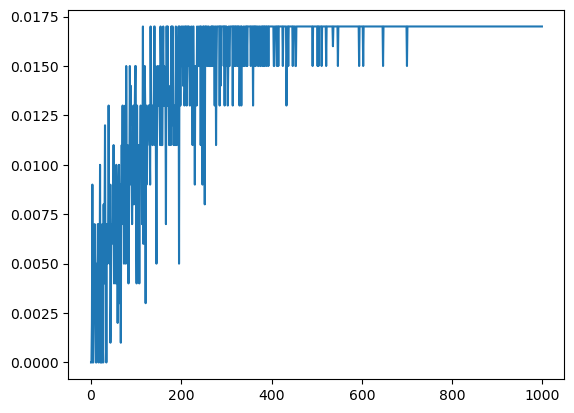

In [18]:
plt.plot(rewards)

In [8]:
dqn_d = DQN_D(n_states, dqn_update_freq, gan_update_freq)

In [9]:
rewards = []
for episode in tqdm(range(n_episodes)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn_d.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn_d.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn_d.step()
        if sa_vals is not None:
            dqn_d.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

  0%|          | 0/1000 [00:00<?, ?it/s]

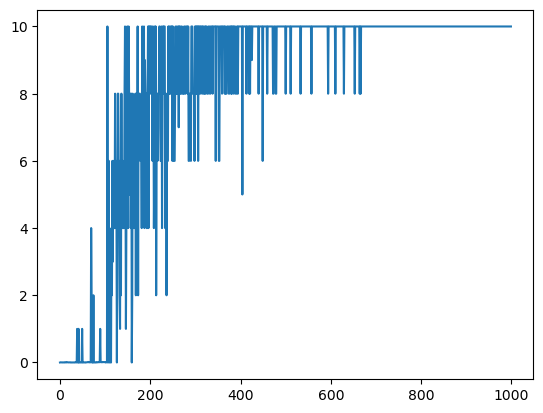

In [10]:
plt.plot(rewards)

In [61]:
dqn_gaex = DQN_GAEX(n_states, dqn_update_freq, gan_update_freq)

In [63]:
rewards = []
for episode in tqdm(range(1000)):
    s = env.reset()
    s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
    reward = 0
    for t in range(steps):
        a = dqn_gaex.action(s)
        r, s_n = env.step(a)
        
        if t+1 == steps:
            s_n = None
        else:
            reward += r.cpu().item()
            
        dqn_gaex.remember(s, a, s_n, r)
        sa_vals, exp_sa_vals = dqn_gaex.step()
        if sa_vals is not None:
            dqn_gaex.optimize(sa_vals, exp_sa_vals)
        
        s = s_n
            
    rewards.append(reward)

  0%|          | 0/1000 [00:00<?, ?it/s]

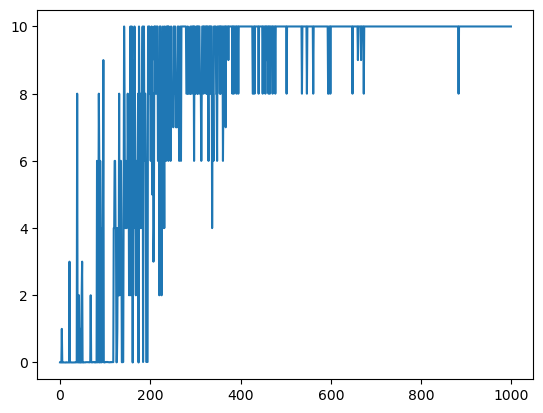

In [64]:
plt.plot(rewards)

In [98]:
n_episodes = 5000
n_iters = 5

In [99]:
n_states = 10
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [100]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [ ]:
%%time
rewards_10 = np.zeros((n_iters, 3, n_episodes))
max_states_10 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in range(steps):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

        rewards_10[idx][jdx][eps] = reward
        max_states_10[idx][jdx][eps] = max_state

iters:   0%|          | 0/5 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

model:   0%|          | 0/3 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

episode:   0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
n_states = 200
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [ ]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [ ]:
%%time
rewards_200 = np.zeros((n_iters, 3, n_episodes))
max_states_200 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in range(steps):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

        rewards_200[idx][jdx][eps] = reward
        max_states_200[idx][jdx][eps] = max_state

In [ ]:
n_states = 1000
steps = n_states + 9
dqn_update_freq = 2 * steps
gan_update_freq = 2 * steps
env = MDP_chain(n_states)

In [ ]:
DQN_f = partial(DQN, dqn_update_freq)
DQN_D_f = partial(DQN_D, n_states, dqn_update_freq, gan_update_freq)
DQN_GAEX_f = partial(DQN_GAEX, n_states, dqn_update_freq, gan_update_freq)

In [ ]:
%%time
rewards_1000 = np.zeros((n_iters, 3, n_episodes))
max_states_1000 = np.zeros((n_iters,3,n_episodes))
for idx in tqdm(range(n_iters), desc='iters', position=0, leave=True):
    for jdx, model_f in tqdm(enumerate((DQN_f, DQN_D_f, DQN_GAEX_f)), desc='model', total=3, position=1, leave=True):
        model = model_f()
        for eps in tqdm(range(n_episodes), desc='episode', position=2, leave=False):
            s = env.reset()
            max_state = s
            s = torch.tensor([s], dtype=torch.float32, device=device).unsqueeze(0)
            reward = 0
            for t in range(steps):
                a = model.action(s)
                r, s_n = env.step(a)

                if t+1 == steps:
                    s_n = None
                else:
                    reward += r.cpu().item()

                model.remember(s, a, s_n, r)
                sa_vals, exp_sa_vals = model.step()
                if sa_vals is not None:
                    model.optimize(sa_vals, exp_sa_vals)

                s = s_n
                if s is not None and s > max_state:
                    max_state = s

        rewards_1000[idx][jdx][eps] = reward
        max_states_1000[idx][jdx][eps] = max_state

In [ ]:
plt.plot(rewards_10.mean(0)[0])
plt.plot(rewards_10.mean(0)[1])
plt.plot(rewards_10.mean(0)[2])

In [ ]:
plt.plot(rewards_200.mean(0)[0])
plt.plot(rewards_200.mean(0)[1])
plt.plot(rewards_200.mean(0)[2])

In [ ]:
plt.plot(rewards_1000.mean(0)[0])
plt.plot(rewards_1000.mean(0)[1])
plt.plot(rewards_1000.mean(0)[2])